# AMAÇ

#### Z-dönüşümü ve özelliklerinin incelenmesi,
#### Sistem fonksiyonunun formlarının öğrenilmesi,
#### Sonlu uzunluklu ve sonsuz uzunluklu işaretlerin Z-dönüşümlerine aşinalık kazanmak,
#### Yakınsama bölgesi (Region of Convergence, ROC) ve sistemlerde etkisini öğrenmek,
#### Kutup-sıfır diyagramları, ROC ve DZD sistem özelliklerinin öğrenilmesi,
#### Python yardımıyla, DZD sistemlerin ve ayrık zamanlı işaretlerin Z-dönüşümü ile analiz 
#### edilmesi,
#### Ters Z-Dönüşümü ve Python ile ters dönüşüm hesaplanması.
#### Z-Dönüşümü ve Fourier Dönüşümü arasındaki ilişkinin incelenmesi,
#### Kutup-sıfır diyagramından frekans cevabının kestirilmesi.

# ÖN ÇALIŞMA-1

### tf2zpk-->Fonksiyonu bize z:zeros,p:poles ve k:kazancı vermektedir 

In [1]:
#Örnek-1

import numpy as np
import scipy.signal as sgnl

b = np.array([5, 5, 1.25]) 
a = np.array([1, -7.0/12, 1.0/12, 0]) 
z, p, k = sgnl.tf2zpk(b, a) 
print("sıfırlar, z:", z)
print("kutuplar, p:", p)
print("kazanc, k:", k)


sıfırlar, z: [-0.5+3.34448375e-09j -0.5-3.34448375e-09j]
kutuplar, p: [0.33333333 0.25       0.        ]
kazanc, k: 5.0


In [2]:
#Örnek-2

b = np.array([5]) 
a = np.array([1, -1.0/3]) 
z, p, k = sgnl.tf2zpk(b, a) 
print("sıfırlar, z:", z)
print("kutuplar, p:", p)
print("kazanc, k:", k)


sıfırlar, z: []
kutuplar, p: [0.33333333]
kazanc, k: 5.0


In [3]:
#Örnek-3

b = np.array([5]) 
a = np.array([1, -1.0/3, 0]) 
z, p, k = sgnl.tf2zpk(b, a) 
print("sıfırlar, z:", z)
print("kutuplar, p:", p)
print("kazanc, k:", k)

sıfırlar, z: []
kutuplar, p: [0.33333333 0.        ]
kazanc, k: 5.0


In [4]:
#Örnek-4

b = np.array([5, -5/2]) 
a = np.array([1, -1/3, 0, 0]) 
z, p, k = sgnl.tf2zpk(b, a) 
print("sıfırlar, z:", z)
print("kutuplar, p:", p)
print("kazanc, k:", k)


sıfırlar, z: [0.5]
kutuplar, p: [0.33333333 0.         0.        ]
kazanc, k: 5.0


In [5]:
#Örnek-5

b = np.array([5, -5/2, 0]) 
a = np.array([1, -10/21, 1/21]) 
z, p, k = sgnl.tf2zpk(b, a) 
print("sıfırlar, z:", z)
print("kutuplar, p:", p)
print("kazanc, k:", k)


sıfırlar, z: [0.5 0. ]
kutuplar, p: [0.33333333 0.14285714]
kazanc, k: 5.0


# ÖN ÇALIŞMA-2

### zpk2tf fonksiyonu, ZPK formundan TF formuna dönüştürmek içindir. 

In [6]:
#Örnek-1

k = 5 # kazanç bu sistem fonksiyonu için 5'tir
z = np.array([-0.5, -0.5]) # iki sıfır (zero) @ z= -1/2, -1/2 
p = np.array([0, 1.0/3, 1.0/4]) # üç kutup (pole) @ z=0, 1/3, 1/4
b, a = sgnl.zpk2tf(z, p, k) 
print("pay, b:", b)
print("payda: a:", a)


pay, b: [5.   5.   1.25]
payda: a: [ 1.         -0.58333333  0.08333333  0.        ]


In [7]:
#Örnek-2

k = 5 # kazanç bu sistem fonksiyonu için 5'tir
z = np.array([]) # hiç sıfır yok
p = np.array([1.0/3]) # bir kutup (pole) @ z= 1/3
b, a = sgnl.zpk2tf(z, p, k) 
print("pay, b:", b)
print("payda: a:", a)


pay, b: [5.]
payda: a: [ 1.         -0.33333333]


In [8]:
#Örnek-3

k = 5 # kazanç bu sistem fonksiyonu için 5'tir
z = np.array([]) # hiç sıfır yok
p = np.array([0, 1.0/3]) # iki kutup (pole) @ z= 0 ve 1/3
b, a = sgnl.zpk2tf(z, p, k) 
print("pay, b:", b)
print("payda: a:", a)


pay, b: [5.]
payda: a: [ 1.         -0.33333333  0.        ]


In [9]:
#Örnek-4

k = 5 # kazanç bu sistem fonksiyonu için 5'tir
z = np.array([1.0/2]) # bir sıfır @ z= 1/2
p = np.array([0, 0, 1.0/3]) # üç kutup @ z= 0, 0, 1/3
b, a = sgnl.zpk2tf(z, p, k) 
print("pay, b:", b)
print("payda: a:", a)


pay, b: [ 5.  -2.5]
payda: a: [ 1.         -0.33333333  0.          0.        ]


In [10]:
#Örnek-5

k = 5 # kazanç bu sistem fonksiyonu için 5'tir
z = np.array([0, 1.0/2]) # iki sıfır @ z= 0, 1/2
p = np.array([1.0/3, 1.0/7]) # iki kutup @ z= 1/3, 1/7
b, a = sgnl.zpk2tf(z, p, k) 
print("pay, b:", b)
print("payda: a:", a)



pay, b: [ 5.  -2.5  0. ]
payda: a: [ 1.         -0.47619048  0.04761905]


# ÖN ÇALIŞMA-3

## kinci dereceden filtreleme işleminin, kısmi kesirli temel fonksiyonlarına ayrılması(residuez) 

In [11]:
#Örnek-1

b = np.array([1, 2, 1]) 
a = np.array([1, -3/2, 1/2]) 
z, p, k = sgnl.residuez(b, a) 
print("kesir katsayıları, z:", z)
print("kutuplar, p:", p)
print("polinom, k:", k)


kesir katsayıları, z: [-9.  8.]
kutuplar, p: [0.5 1. ]
polinom, k: [2.]


In [12]:
#Örnek-2

b = np.array([1]) 
a = np.array([1, -3/4, 1/8]) 
z, p, k = sgnl.residuez(b, a) 
print("kesir katsayıları, z:", z)
print("kutuplar, p:", p)
print("polinom, k:", k)


kesir katsayıları, z: [-1.  2.]
kutuplar, p: [0.25 0.5 ]
polinom, k: []


In [13]:
#Örnek-3

b = np.array([5,1, 4, 3]) 
a = np.array([1, -3]) 
z, p, k = sgnl.residuez(b, a) 
print("kesir katsayıları, z:", z)
print("kutuplar, p:", p)
print("polinom, k:", k)


kesir katsayıları, z: [5.88888889]
kutuplar, p: [3.]
polinom, k: [-0.88888889 -1.66666667 -1.        ]


In [14]:
#Örnek-4

b = np.array([-11, 16, -7]) 
a = np.array([1, -4/3, 7/12, -1/12]) 
z, p, k = sgnl.residuez(b, a) 
print("kesir katsayıları, z:", z)
print("kutuplar, p:", p)
print("polinom, k:", k)


kesir katsayıları, z: [-104.  114.  -21.]
kutuplar, p: [0.33333333 0.5        0.5       ]
polinom, k: []


In [15]:
#Örnek-5

b = np.array([1]) 
a = np.array([1, -3/4, 0, 1/16]) 
z, p, k = sgnl.residuez(b, a) 
print("kesir katsayıları, z:", z)
print("kutuplar, p:", p)
print("polinom, k:", k)


kesir katsayıları, z: [0.11111111 0.22222222 0.66666667]
kutuplar, p: [-0.25  0.5   0.5 ]
polinom, k: []


In [16]:
#Örnek-6

b = np.array([0, 5, 5, 1.25]) 
a = np.array([1, -7/12, 1/12]) 
z, p, k = sgnl.residuez(b, a) 
print("kesir katsayıları, z:", z)
print("kutuplar, p:", p)
print("polinom, k:", k)


kesir katsayıları, z: [-540.  375.]
kutuplar, p: [0.25       0.33333333]
polinom, k: [165.  15.]


# ÖN ÇALIŞMA-4

## freqz-->Frekans cevabını incelememize yarar 

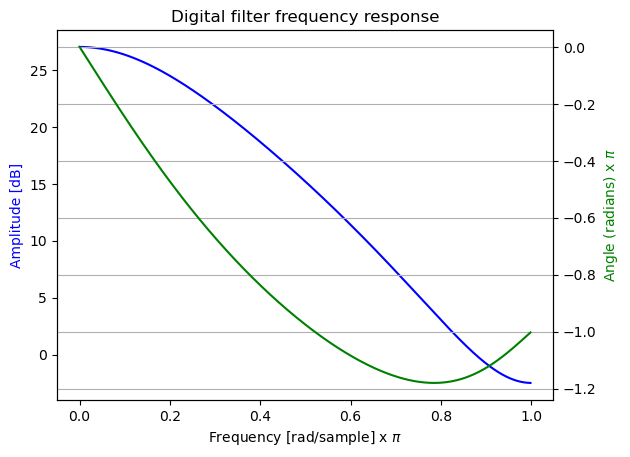

In [18]:
#Örnek-1


import numpy as np
import scipy.signal as sgnl
import matplotlib.pyplot as plt
b = np.array([0, 5, 5, 1.25]) 
a = np.array([1, -7.0/12, 1.0/12, 0]) 
w, h = sgnl.freqz(b, a)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w/np.pi, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample] x $\pi$')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w/np.pi, angles/np.pi, 'g')
ax2.set_ylabel('Angle (radians) x $\pi$', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()


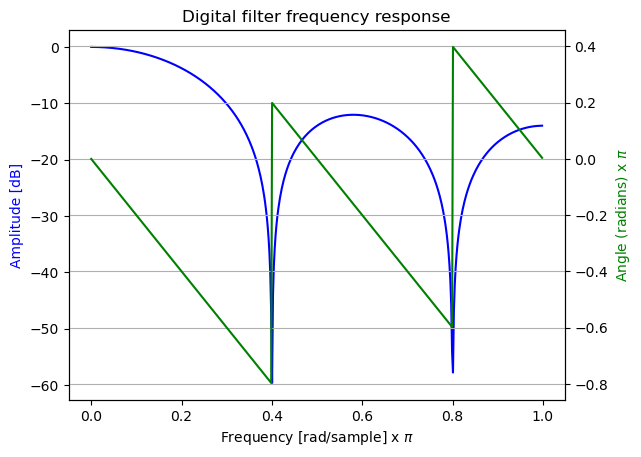

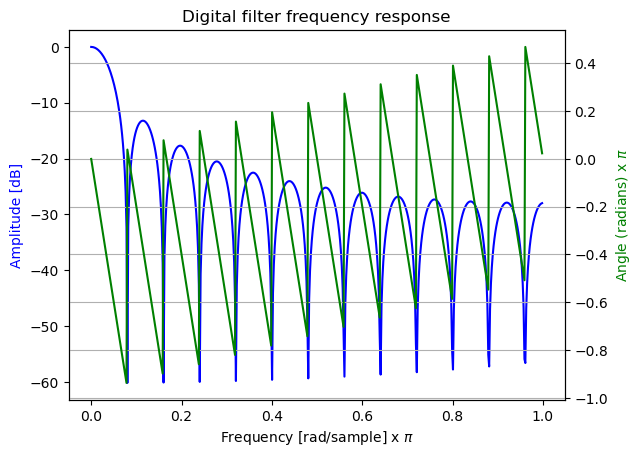

In [19]:
#Örnek-2

b = np.ones(5)/5 
a = np.array([1]) 
w, h = sgnl.freqz(b, a)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w/np.pi, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample] x $\pi$')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w/np.pi, angles/np.pi, 'g')
ax2.set_ylabel('Angle (radians) x $\pi$', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()
b = np.ones(25)/25 
a = np.array([1]) 
w, h = sgnl.freqz(b, a)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w/np.pi, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample] x $\pi$')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w/np.pi, angles/np.pi, 'g')
ax2.set_ylabel('Angle (radians) x $\pi$', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()


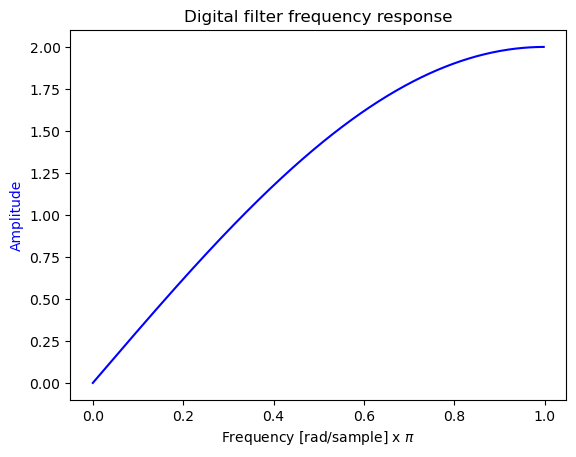

In [20]:
#Örnek-3

b = np.array([1,-1]) 
a = np.array([1]) 
w, h = sgnl.freqz(b, a)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w/np.pi, abs(h), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample] x $\pi$')
plt.show()


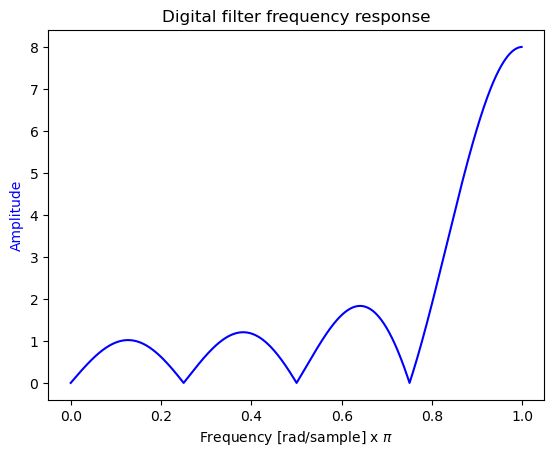

In [21]:
#Örnek-4


b = np.array([1,-1,1,-1,1,-1,1,-1]) 
a = np.array([1]) 
w, h = sgnl.freqz(b, a)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w/np.pi, abs(h), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample] x $\pi$')
plt.show()



# ÖN ÇALIŞMA-5

## freqz_zpk-->filtrenin frekans cevabını bulmak için 

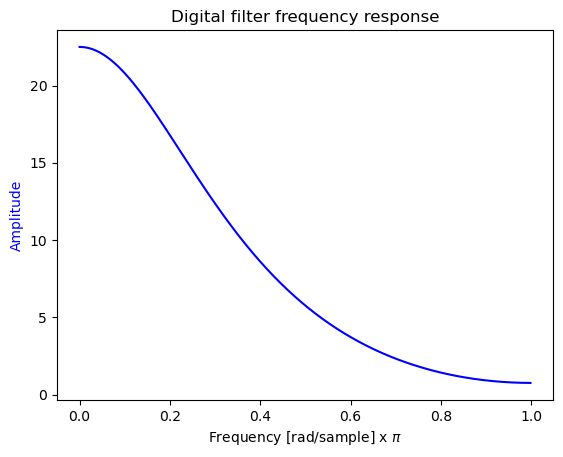

In [22]:
#Örnek-1


import numpy as np
import scipy.signal as sgnl
import matplotlib.pyplot as plt


k = 5 # kazanç bu sistem fonksiyonu için 5'tir
z = np.array([-0.5, -0.5]) # iki sıfır (zero) @ z= -1/2, -1/2 
p = np.array([0, 1.0/3, 1.0/4]) # üç kutup (pole) @ z=0, 1/3, 1/4
w, h = sgnl.freqz_zpk(z, p, k)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w/np.pi, abs(h), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample] x $\pi$')
plt.show()


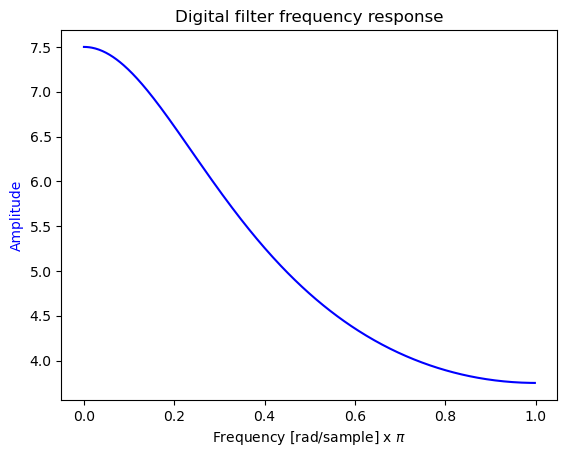

In [23]:
#Örnek-2


k = 5 # kazanç bu sistem fonksiyonu için 5'tir
z = np.array([]) # hiç sıfır yok
p = np.array([1.0/3]) # bir kutup (pole) @ z= 1/3
w, h = sgnl.freqz_zpk(z, p, k)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w/np.pi, abs(h), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample] x $\pi$')
plt.show()


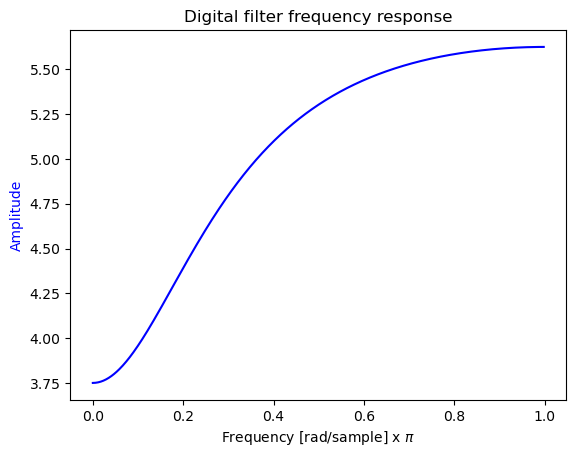

In [24]:
#Örnek-3


k = 5 # kazanç bu sistem fonksiyonu için 5'tir
z = np.array([1.0/2]) # bir sıfır @ z= 1/2
p = np.array([0, 0, 1.0/3]) # üç kutup @ z= 0, 0, 1/3
w, h = sgnl.freqz_zpk(z, p, k)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w/np.pi, abs(h), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample] x $\pi$')
plt.show()


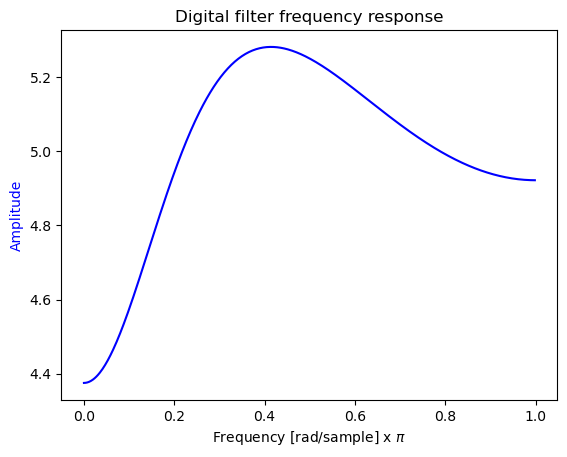

In [25]:
#Örnek-4


k = 5 # kazanç bu sistem fonksiyonu için 5'tir
z = np.array([0, 1/2]) # iki sıfır @ z= 0, 1/2
p = np.array([1/3, 1/7]) # iki kutup @ z= 1/3, 1/7
w, h = sgnl.freqz_zpk(z, p, k)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w/np.pi, abs(h), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample] x $\pi$')
plt.show()


# Z-Plane Code 

In [29]:
# alternative syntax: from scipy import signal as sgnl

def zplane(b,a):

	# Input: numerator and denominator coefficients:
	zeross,poless,k = sgnl.tf2zpk(b, a)
	if not zeross.size:
		zeross = np.zeros(len(poless))
		
	if not poless.size:
		poless = np.zeros(len(zeross))

	tol = 1e-4

	real_p = np.real(poless).copy()
	real_z = np.real(zeross).copy()
	imag_p = np.imag(poless).copy()
	imag_z = np.imag(zeross).copy()

	if not real_z.size:
		real_z[abs(real_z) < tol] = 0
	if not imag_z.size:
		imag_z[abs(imag_z) < tol] = 0
	if not real_p.size:
		real_p[abs(real_p) < tol] = 0
	if not imag_p.size:
		imag_p[abs(imag_p) < tol] = 0

	z = np.round(real_z,2) + 1j*np.round(imag_z,2)
	p = np.round(real_p,2) + 1j*np.round(imag_p,2)

	# plot the unit circle
	N = 128
	m = np.arange(0,N,1)
	unitCircle = np.exp(1j*m*2*np.pi/N)

	plt.figure()
	plt.plot(np.real(unitCircle), np.imag(unitCircle), 'b--', linewidth=0.3)
	plt.xlabel('Real Part'), plt.ylabel('Imaginary Part')

	# calculate the plot limits
	Cz, z_counts = np.unique(z, return_counts=True)
	Cp, p_counts = np.unique(p, return_counts=True)

	zz = [idx1 for idx1, valz in enumerate(z_counts) if valz > 1]
	pp = [idx2 for idx2, valp in enumerate(p_counts) if valp > 1]
	zval = z_counts[zz]
	pval = p_counts[pp]
	zs = Cz[zz]
	ps = Cp[pp]

	real_roots = np.concatenate((np.real(p),np.real(z)))
	imag_roots = np.concatenate((np.imag(p),np.imag(z)))

	# adjust plot limits
	xlower = min(-1, min(real_roots)) - 0.3
	xupper = max(1,  max(real_roots)) + 0.3
	ylower = min(-1, min(imag_roots)) - 0.3
	yupper = max(1,  max(imag_roots)) + 0.3
	plt.xlim(xlower, xupper), plt.ylim(ylower, yupper)

	# plot axes
	Xaxis = np.arange(xlower, xupper, 0.1)
	Yaxis = np.arange(ylower, yupper, 0.1)
	plt.plot(np.real(Xaxis), np.imag(Xaxis), 'b--', linewidth=0.3)
	plt.plot(np.imag(Yaxis), np.real(Yaxis), 'b--', linewidth=0.3)

	# plot poles and zeros
	plt.plot(np.real(z), np.imag(z), 'ro',  markerfacecolor = 'none')
	plt.plot(np.real(p), np.imag(p), 'rx')

	if zz:
		txtz = str(zval)[1:-1]
		plt.annotate(txtz, xy=(np.real(zs)+0.1,np.imag(zs)+0.1))
		
	if pp:
		txtp = str(pval)[1:-1]
		plt.annotate(txtp, xy=(np.real(ps)+0.1,np.imag(ps)+0.1))

	plt.grid()
	plt.show()


# ÖDEV-4 

## a-) 

## Verilen $ y[n] = \frac{1}{2} y[n-1] - 4y[n-2] + 2 y[n-3] + x[n] + \frac{2}{3} x[n-1] + \frac{1}{9} x[n-2] $ sistemin sistem fonksiyonu $ H(z) = \frac{Y(z)}{X(z)} $ ile bulunur.
$ Y(z) = \frac{1}{2} Y(z)z^{-1} - 4Y(z)z^{-2} + 2 Y(z)z^{-3} + X(z) + \frac{2}{3} X(z)z^{-1} + \frac{1}{9} X(z)z^{-2} \Rightarrow $
$ Y(z) - \frac{1}{2} Y(z)z^{-1} +  4Y(z)z^{-2}  - 2 Y(z)z^{-3} = X(z) + \frac{2}{3} X(z)z^{-1} + \frac{1}{9} X(z)z^{-2} \Rightarrow $
$  Y(z)[1 - \frac{1}{2}z^{-1} +  4z^{-2}  - 2z^{-3}] = X(z)[1 + \frac{2}{3} z^{-1} + \frac{1}{9} z^{-2} ] \Rightarrow $

$ \frac{Y(z)}{X(z)} = H(z) = \frac{1 + \frac{2}{3} z^{-1} + \frac{1}{9} z^{-2}} {1 - \frac{1}{2}z^{-1} +  4z^{-2}  - 2z^{-3}}$
## Sistem fonksiyonu $  H(z) = \frac{1 + \frac{2}{3} z^{-1} + \frac{1}{9} z^{-2}} {1 - \frac{1}{2}z^{-1} +  4z^{-2}  - 2z^{-3}} $ olarak bulunur.

## Girişe Dürtü işareti vererek sistemin çıkışını bulacak olursak:
### x[n] işaretinin yerine $\delta[n]$ yazarsak,Giriş işareti $\delta[n]$ olduğunda çıkış işareti h[n] olur.
### $h[n]-\frac{1}{2}h[n-1]+4h[n-2]-2h[n-3]=\delta[n]+\frac{2}{3}\delta[n-1]+\frac{1}{9}\delta[n-2]$
### z dönüşümü:$H(z)=-\frac{1}{2}H(z)z^{-1}+4H(z)z^{-2}-2H(z)z^{-3}=1+\frac{2}{3}z^{-1}+\frac{1}{9}z^{-2}$
### $H(z)(1-\frac{1}{2}z^{-1}+4z^{-2}-2z^{-3}) = 1+\frac{2}{3}z^{-1}+\frac{1}{9}z^{-2} $
### $H(z)= \frac{1+\frac{2}{3}z^{-1}+\frac{1}{9}z^{-2}}{(1-\frac{1}{2}z^{-1}+4z^{-2}-2z^{-3})} $ 
### Görüldüğü gibi yapılan işlemler sonucunda her iki sonucta bize aynı ifadeyi vermektedir.

## b-) 

<Figure size 640x480 with 0 Axes>

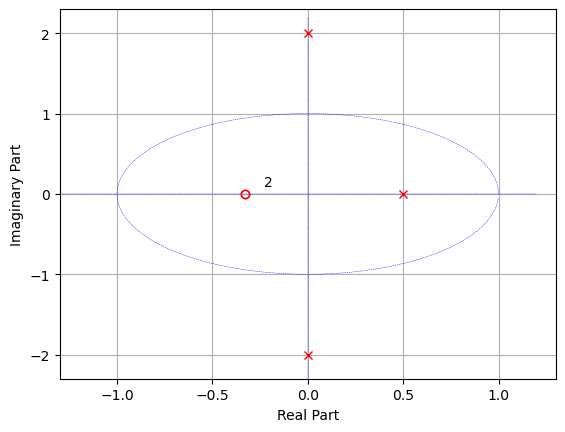

In [30]:
num = np.array([1, 2.0/3, 1.0/9]) #pay kısmındaki terimlerin katsayıları 
denum = np.array([1, -1.0/2, 4, -2])#payda kısmında terimlerin katsayıları 

plt.figure()
zplane(num,denum)

## c-) 

### c.1-) 

#### $ h[n] = 0, n < 0 $ ise sistem nedenseldir. Nedensel sistemler sağ yanlıdır ve negatif durumlarda sistemin dürtüsü yoktur.z-transformu olan sistemler ROC bölgesinde pole içermemelidir. Bu durumda ROC aşağıdaki gibi belirlenir.
#### ROC: |z| > 2 

### c.2-) 

#### Verilen bir sistemin fourier transformunun olabilmesi için real eksendeki pole'u ve zeroyu kapsalamalıdır. Pole 0.5 de zero ise 2 noktasındadır iki noktanın kapsamı bir halka oluşturur
#### ROC: 0.5 < |z| < 2

## d-) 

Text(0.5, 1.0, 'Impulse Response')

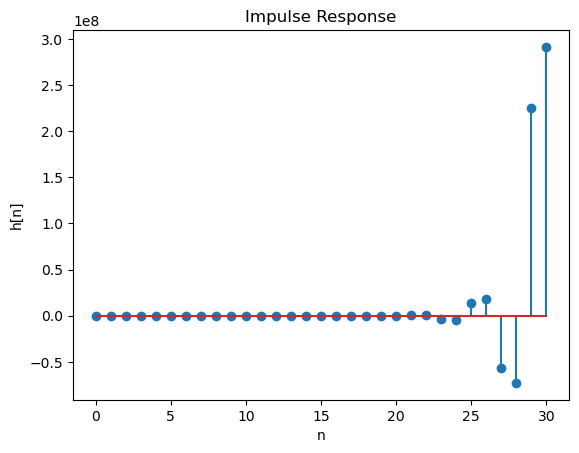

In [43]:
num = np.array([1, 2.0/3, 1.0/9]) #pay kısmındaki terimlerin katsayıları 
denum = np.array([1, -1.0/2, 4, -2])#payda kısmında terimlerin katsayıları 
n, x = sgnl.dimpulse((num, denum, 1),x0=0, n=31)#x0=start, n=finish
plt.stem(n, np.squeeze(x))
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Impulse Response')

### Bir sistemin kararlı olabilmesi için mutlak toplanabilir olması gerekmekte. Yani |h[n]| değerlinin sonlu olması gerekmektedir ama elde ettiğimiz grafikte n değerleri arttıkça genlik değerleride arttığından sistem kararlı değildir.

# e-)

### Verilen bir sistemin kararlı olabilmesi için mutlak toplanabilir olması gerekmetedir. Neden olabilmesi için ise sağ yanlı  olması gerekmetedir.Kararlılık şartını elde ettiğimiz z-plane eksininde kolaylıkla inceleyebiliriz, elde ettiğimiz ROC olarak bulduğumuz poles ve zeros noktalarını içermelidir. Grafik üzerinden kontrol ettiğimizde imajiner eksendeki +2j ve -2j değerlerinin kapsamadığı gözlemlenmektedir. Bu iki değeri kaldırırsak sistem kararlıdır demektir. Matematiksel olarak aşağıdaki işlemleri yaparsak sistem kararlı ve nedensel olacaktır;


## $ H(z) = H(z)*(z + 2j)*(z - 2j) = (z^2 + 4)*H(z)$
## $ H(z) =\frac{(z^2 + 4) + (z^2 + 4) \frac{2}{3} z^{-1} + (z^2 + 4) \frac{1}{9} z^{-2}} {1 - \frac{1}{2}z^{-1} +  4z^{-2}  - 2z^{-3}} = \frac{ z^2 + \frac{2}{3}z + \frac{37}{9} + \frac{8}{3}z^{-1} + \frac{4}{9}z^{-2}}{1 - \frac{1}{2}z^{-1} +4z^{-2} -2z^{-3}}$


# f-)

<Figure size 640x480 with 0 Axes>

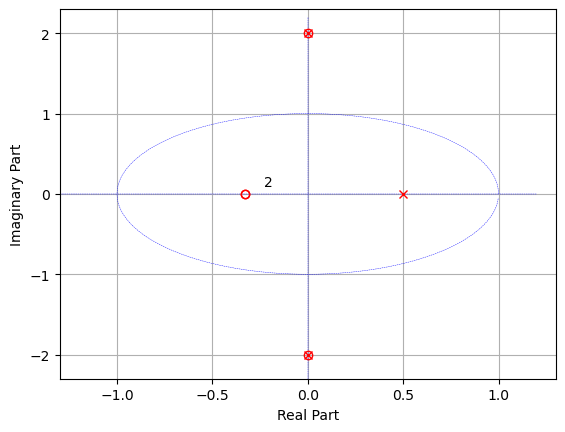

In [44]:
num   = np.array([1, 2.0/3, 37.0/9, 8.0/3, 4.0/9 ])# Hnew(z) sistem fonksiyonunda pay kısmında z^n terimlerinin hiyerarşik katsayıları 
denum = np.array([0, 1, -1.0/2, 4, -2])# Hnew(z) sistem fonksiyonunda payda kısmında z^n terimlerinin hiyerarşik katsayıları 

plt.figure()
zplane(num,denum)

### e-) kısmında yapılan ekleme işlemi z-plane'de görülmektedir. z = -2j ve z = 2j noktalarında kökler hem pole hem zero olarak görülmektedir. Köklerin sadeleşmesi sonucunda sistem hem kararlı hem nedenseldir  

# f-)

<IPython.core.display.Javascript object>


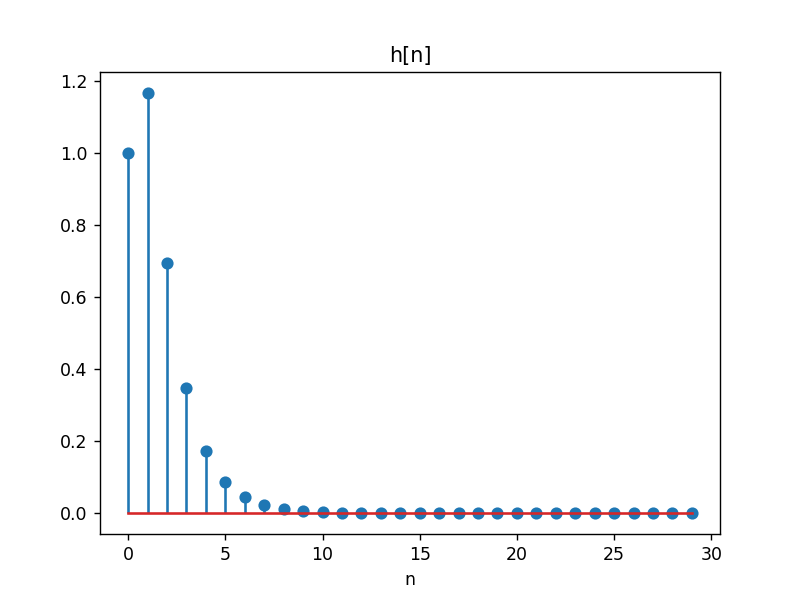

Text(0.5, 1.0, 'h[n]')

In [4]:

# import the necessary libraries
import numpy as np # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary
# the main package for signal processing is called "scipy" and we will use "signal" 
import scipy.signal as sgnl
# alternative syntax: from scipy import signal as sgnl
%matplotlib notebook
# WE NEED TO IMPORT THE CUSTOM (USER DEFINED) FUNCTION AS WELL, IN ORDER TO USE IT!!
import zplane


zeros = np.array([0,-1/3,-1/3]) # observe that the numerator can be defined as transf
poles = np.array([1/2])
dirac=np.zeros(30)
num, denum = sgnl.zpk2tf(zeros, poles, 1) # will return the coefficients b and a, r
w1, H_tf = sgnl.freqz(num, denum)
n = np.arange(0, 30, 1) # define the index vector
for i in range(len(n)):
    if i==0:
        dirac[i]=1
    else:
        dirac[i]=0
yn = sgnl.lfilter(num, denum, dirac)
plt.figure()
plt.stem(n, yn)
plt.xlabel("n")
plt.title("h[n]")


## Yukarıdaki grafiğe bakıldığında görülmektedir ki sistem toplam toplabilirlik şartını sağlamaktadır ve kararlı hale gelmiştir. 